In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [8]:
file_names = [
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHG.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CHH.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles/output_metadata_CpG.Col-0.wt.whole-organism.csv",
]

new_file_names = [
    "/shares/grossniklaus.botinst.uzh/eharputluoglu/newShannonFilesDir/shannonFiles1/" + path.split('/')[-1]
    for path in file_names
]

file_names = new_file_names

#combined_df = pd.read_csv("combined_df.csv")

In [10]:
dfs = [pd.read_csv(file_name, sep="\t") for file_name in file_names]


In [21]:
interval_measurements = []

for df, context in zip(dfs, file_names):
    context_name = context.split('.')[-2] + "-" + ((context.split('/')[-1]).split('.')[0]).split('_')[-1] 
    #print(context_name)
    df['interval'] = df['start'].astype(str) + '-' + df['end'].astype(str)  
    context_measurement = df.set_index('interval')['JSD_bit_'].rename(context_name)
    interval_measurements.append(context_measurement)

In [22]:
combined_df = pd.DataFrame()

for series in interval_measurements:
    combined_df = combined_df.join(series, how='outer')


print(combined_df.index.name)  # This should output 'interval'

interval


In [28]:
#combined_df.to_csv("combined_df_chr1.csv")
combined_df = pd.read_csv("combined_df_chr1.csv")

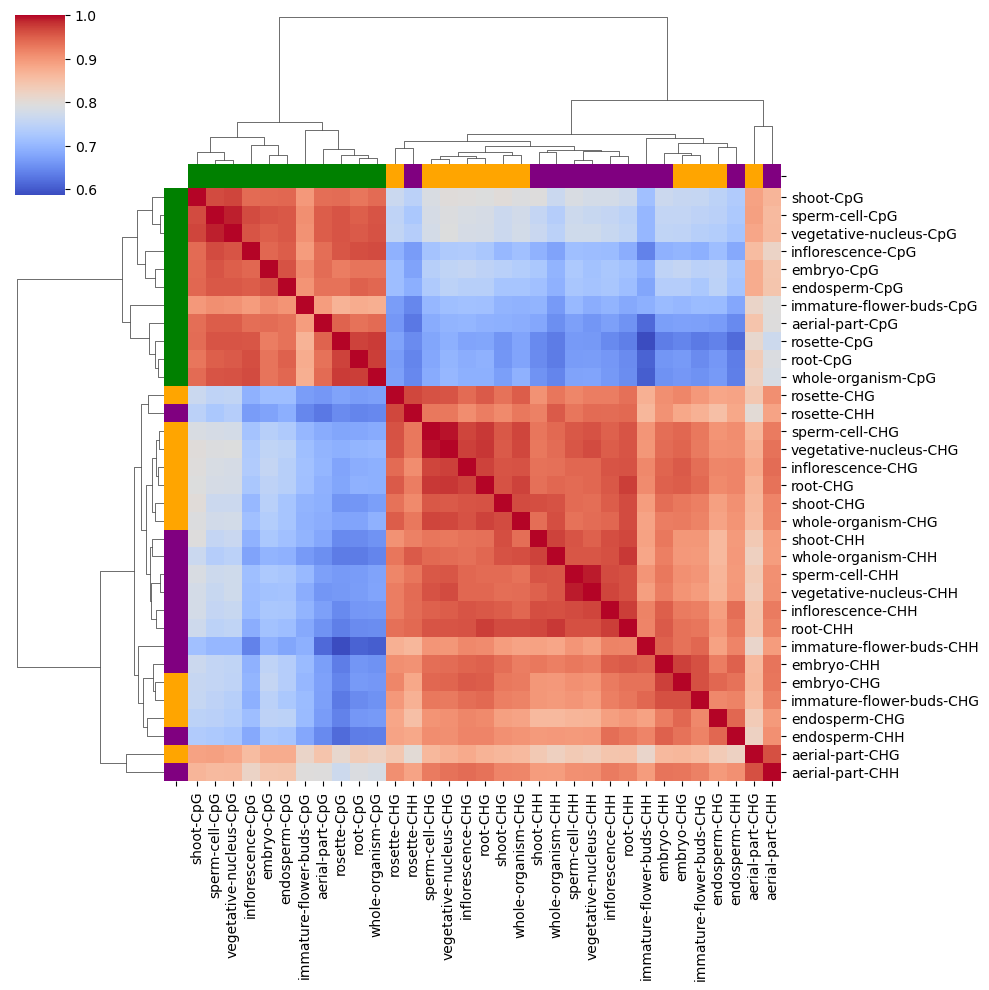

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

numeric_index = combined_df.index.str.split('-').str[0].astype(int)
combined_df.index = numeric_index

window_size = 100000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman', min_periods = 2)

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.clustermap(correlation_matrix, cmap='coolwarm', col_colors=col_colors, row_colors = col_colors, figsize=(10, 10))

plt.show()

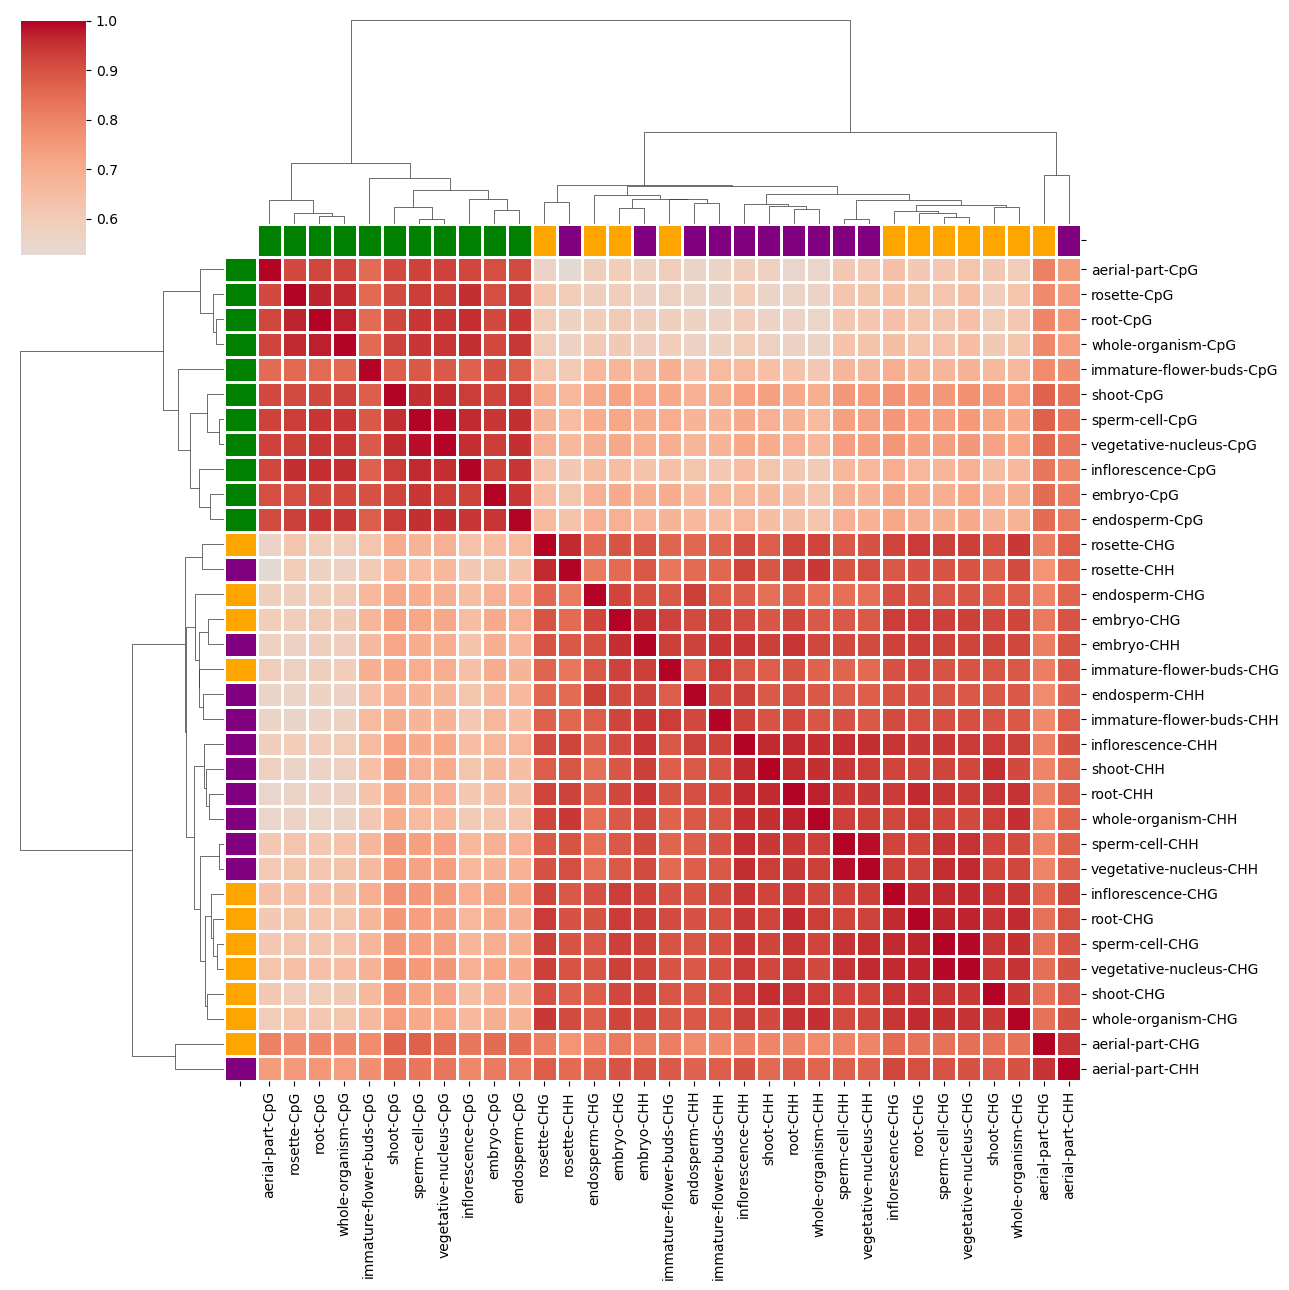

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 60000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman')

correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)


#sns.clustermap(correlation_matrix, cmap='coolwarm', col_colors=col_colors, row_colors = col_colors, figsize=(10, 10))


sns.clustermap(correlation_matrix, cmap ="coolwarm",
                           center=0.5, 
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(13, 13))




plt.show()

In [29]:
#combined_df = combined_df.rename(columns=lambda x: '-'.join(x.split('-')[::-1]).replace('CpG', 'CG'))


combined_df = combined_df.rename(columns=lambda x: '-'.join([x.split('-')[-1]] + x.split('-')[:-1]))


print(combined_df.columns)



Index(['interval', 'CHG-aerial-part', 'CHG-embryo', 'CHG-endosperm',
       'CHG-immature-flower-buds', 'CHG-inflorescence', 'CHG-root',
       'CHG-rosette', 'CHG-shoot', 'CHG-sperm-cell', 'CHG-vegetative-nucleus',
       'CHG-whole-organism', 'CHH-aerial-part', 'CHH-embryo', 'CHH-endosperm',
       'CHH-immature-flower-buds', 'CHH-inflorescence', 'CHH-root',
       'CHH-rosette', 'CHH-shoot', 'CHH-sperm-cell', 'CHH-vegetative-nucleus',
       'CHH-whole-organism', 'CpG-aerial-part', 'CpG-embryo', 'CpG-endosperm',
       'CpG-immature-flower-buds', 'CpG-inflorescence', 'CpG-root',
       'CpG-rosette', 'CpG-shoot', 'CpG-sperm-cell', 'CpG-vegetative-nucleus',
       'CpG-whole-organism'],
      dtype='object')


In [42]:
row_labels = [
    'CHG-rosette',
    'CHH-rosette',
    'CHG-endosperm',
    'CHH-endosperm',
    'CHG-embryo',
    'CHH-embryo',
    'CHG-immature-flower-buds',
    'CHH-immature-flower-buds',
    'CHH-shoot',
    'CHH-root',
    'CHH-whole-organism',
    'CHH-inflorescence',
    'CHH-sperm-cell',
    'CHH-vegetative-nucleus',
    'CHG-sperm-cell',
    'CHG-vegetative-nucleus',
    'CHG-inflorescence',
    'CHG-root',
    'CHG-shoot',
    'CHG-whole-organism',
    'CHG-aerial-part',
    'CHH-aerial-part',
    'CpG-aerial-part',
    'CpG-rosette',
    'CpG-root',
    'CpG-whole-organism',
    'CpG-shoot',
    'CpG-sperm-cell',
    'CpG-vegetative-nucleus',
    'CpG-immature-flower-buds',
    'CpG-inflorescence',
    'CpG-embryo',
    'CpG-endosperm'
]

col_labels = row_labels

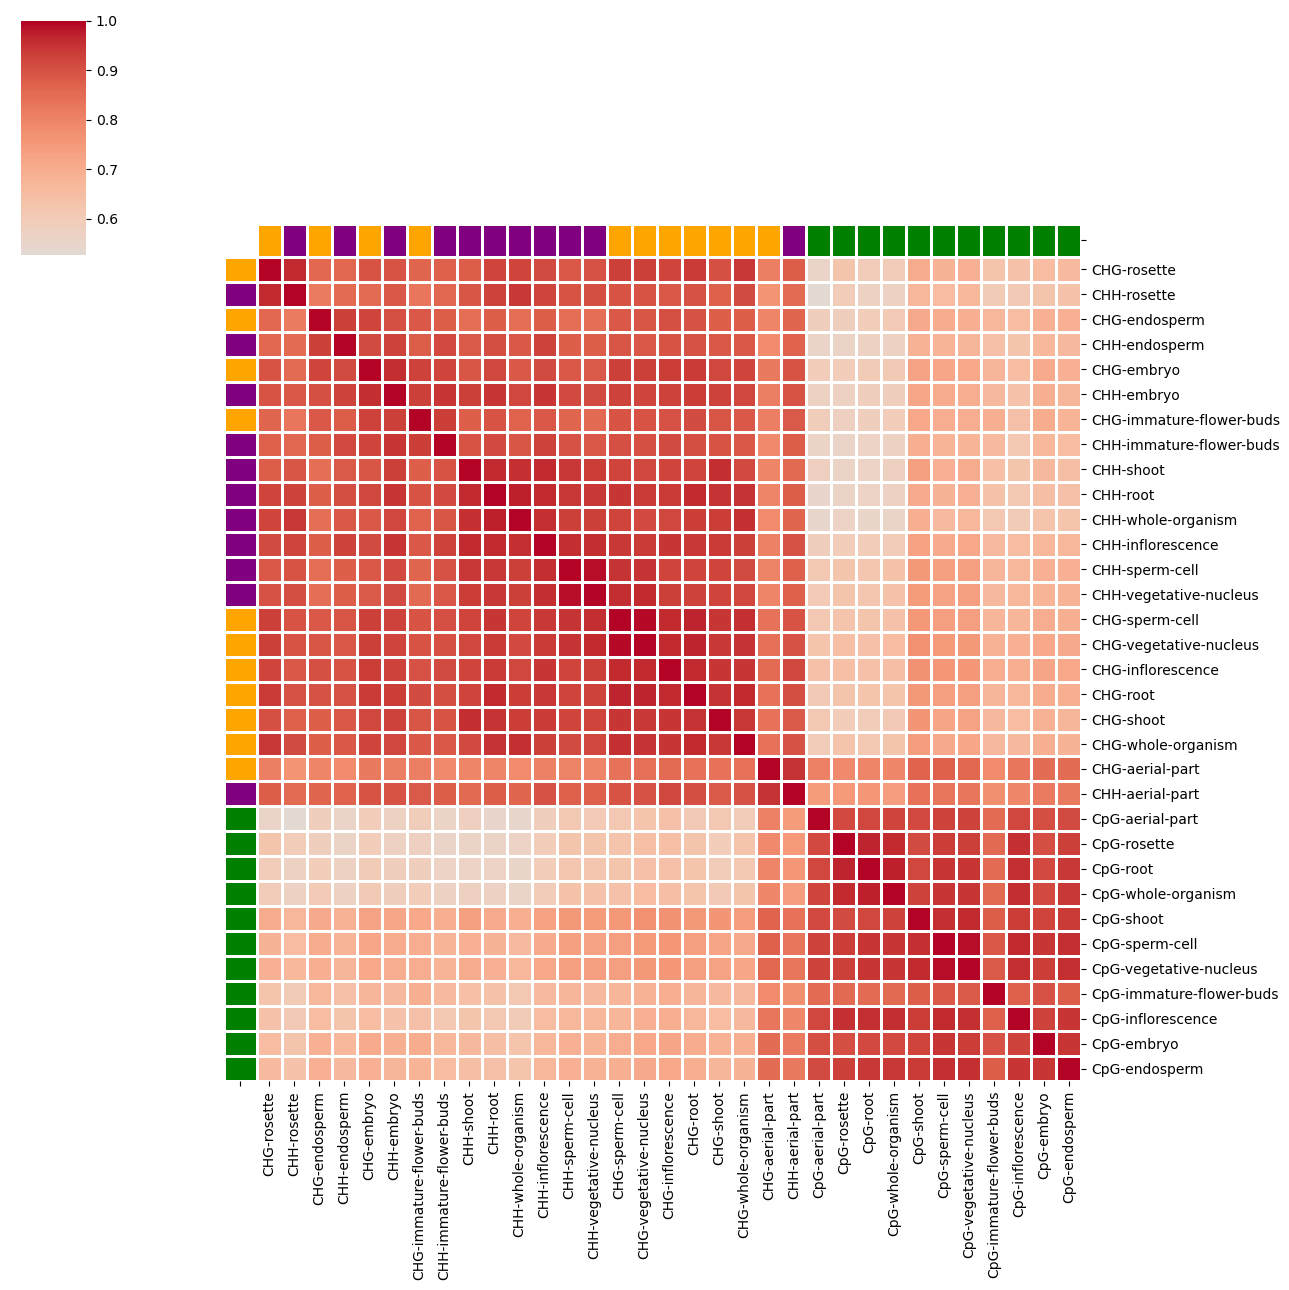

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[0])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 60000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman')

correlation_matrix = correlation_matrix.loc[row_labels, col_labels]


fig = sns.clustermap(correlation_matrix, cmap ="coolwarm",
                           center=0.5, 
                           row_colors=col_colors, col_colors=col_colors,
                     row_cluster=False, 
                           col_cluster=False,
                           linewidths=0.75, figsize=(13, 13))






In [45]:
fig.savefig("ClusterMap_Chr1_ExactOrder.png")

In [40]:
correlation_matrix

,CHG-aerial-part,CHG-embryo,CHG-endosperm,CHG-immature-flower-buds,CHG-inflorescence,CHG-root,CHG-rosette,CHG-shoot,CHG-sperm-cell,CHG-vegetative-nucleus,...,CpG-embryo,CpG-endosperm,CpG-immature-flower-buds,CpG-inflorescence,CpG-root,CpG-rosette,CpG-shoot,CpG-sperm-cell,CpG-vegetative-nucleus,CpG-whole-organism
CHG-aerial-part,1.000000,0.823127,0.796740,0.811603,0.852130,0.837194,0.808345,0.838336,0.837100,0.842576,...,0.847980,0.851132,0.784244,0.829508,0.799241,0.787468,0.868485,0.870586,0.862615,0.790322
CHG-embryo,0.823127,1.000000,0.921000,0.927085,0.936328,0.940379,0.896117,0.917503,0.931212,0.930141,...,0.706760,0.691095,0.674244,0.649037,0.601578,0.592609,0.725969,0.715537,0.712956,0.606324
CHG-endosperm,0.796740,0.921000,1.000000,0.889026,0.902111,0.899628,0.861438,0.876543,0.887774,0.892157,...,0.688366,0.687711,0.669184,0.650897,0.592162,0.586997,0.708191,0.701194,0.694527,0.602751
CHG-immature-flower-buds,0.811603,0.927085,0.889026,1.000000,0.901517,0.911510,0.865570,0.893157,0.897299,0.895158,...,0.702895,0.678016,0.691931,0.638730,0.585605,0.578091,0.713810,0.697276,0.696653,0.593435
CHG-inflorescence,0.852130,0.936328,0.902111,0.901517,1.000000,0.961319,0.925586,0.945961,0.959442,0.963146,...,0.719600,0.714125,0.695180,0.698184,0.640864,0.642320,0.767314,0.756204,0.755992,0.648037
CHG-root,0.837194,0.940379,0.899628,0.911510,0.961319,1.000000,0.938710,0.950344,0.969435,0.969694,...,0.700519,0.691976,0.676045,0.669729,0.626490,0.624545,0.752524,0.734397,0.738100,0.629028
CHG-rosette,0.808345,0.896117,0.861438,0.865570,0.925586,0.938710,1.000000,0.902785,0.933116,0.933153,...,0.655796,0.658742,0.627094,0.634438,0.596102,0.622520,0.701239,0.681932,0.689724,0.596028
CHG-shoot,0.838336,0.917503,0.876543,0.893157,0.945961,0.950344,0.902785,1.000000,0.945044,0.943491,...,0.685596,0.674524,0.663460,0.650658,0.597234,0.592365,0.758897,0.720019,0.725829,0.609525
CHG-sperm-cell,0.837100,0.931212,0.887774,0.897299,0.959442,0.969435,0.933116,0.945044,1.000000,0.992233,...,0.699549,0.692068,0.674067,0.673589,0.621909,0.627466,0.753360,0.736047,0.736948,0.634981
CHG-vegetative-nucleus,0.842576,0.930141,0.892157,0.895158,0.963146,0.969694,0.933153,0.943491,0.992233,1.000000,...,0.712769,0.711366,0.685705,0.690680,0.641119,0.644385,0.768827,0.747964,0.753621,0.654532
